Resnet을 간단하게 일고 VGGnet을 읽으니 model의 뼈대를 더 자세히 알 수 있었다. 왜 사람들이 VGG를 많이 backbone으로 사용하는 지 알 수 있었으며 또한 layer의 깊이가 점점 깊어질 수 있었는 지 또한 알 수 있게 되었다.

논문: https://arxiv.org/pdf/1409.1556v6.pdf

# VGGnet

1. VGGnet은 2세대 모델로 전의 모델들의 평균 layer층은 10개가 넘지 않았다.
    - 논문의 제목이 Very deep CN인 이유가 있다.
2. 또한 filter의 크기가 7x7, 11x11 처럼 보다 큰 필터를 사용했다.(단, strid= 1)
    - ex) 7x7 = 49, 3x3x3 = 27
3. 필터를 여러단계를 사용하면서 non-linearity를 활용하여 파라미터를 줄여 연상량을 줄이면서 특성 추출의 성능은 유지했다.(convolution 층은 Relu 함수를 포함한다.)



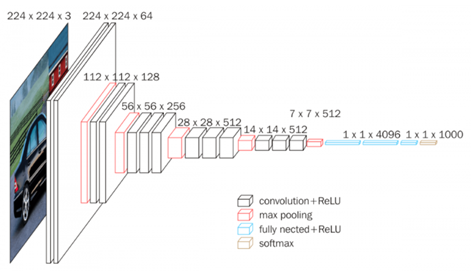

VGGnet 모델
- 추가 설명
    1. spital을 유지하기 위해 padding을 사용
    2. 5번의 maxpooling
    3. 모든 hidden layer에 ReLU
    4. 세 개의 Fully-Connected(FC) layer(고정)
    5. 구조에 점점 layer을 추가하며 비교
    6. input size: 224x224 로 고정
     

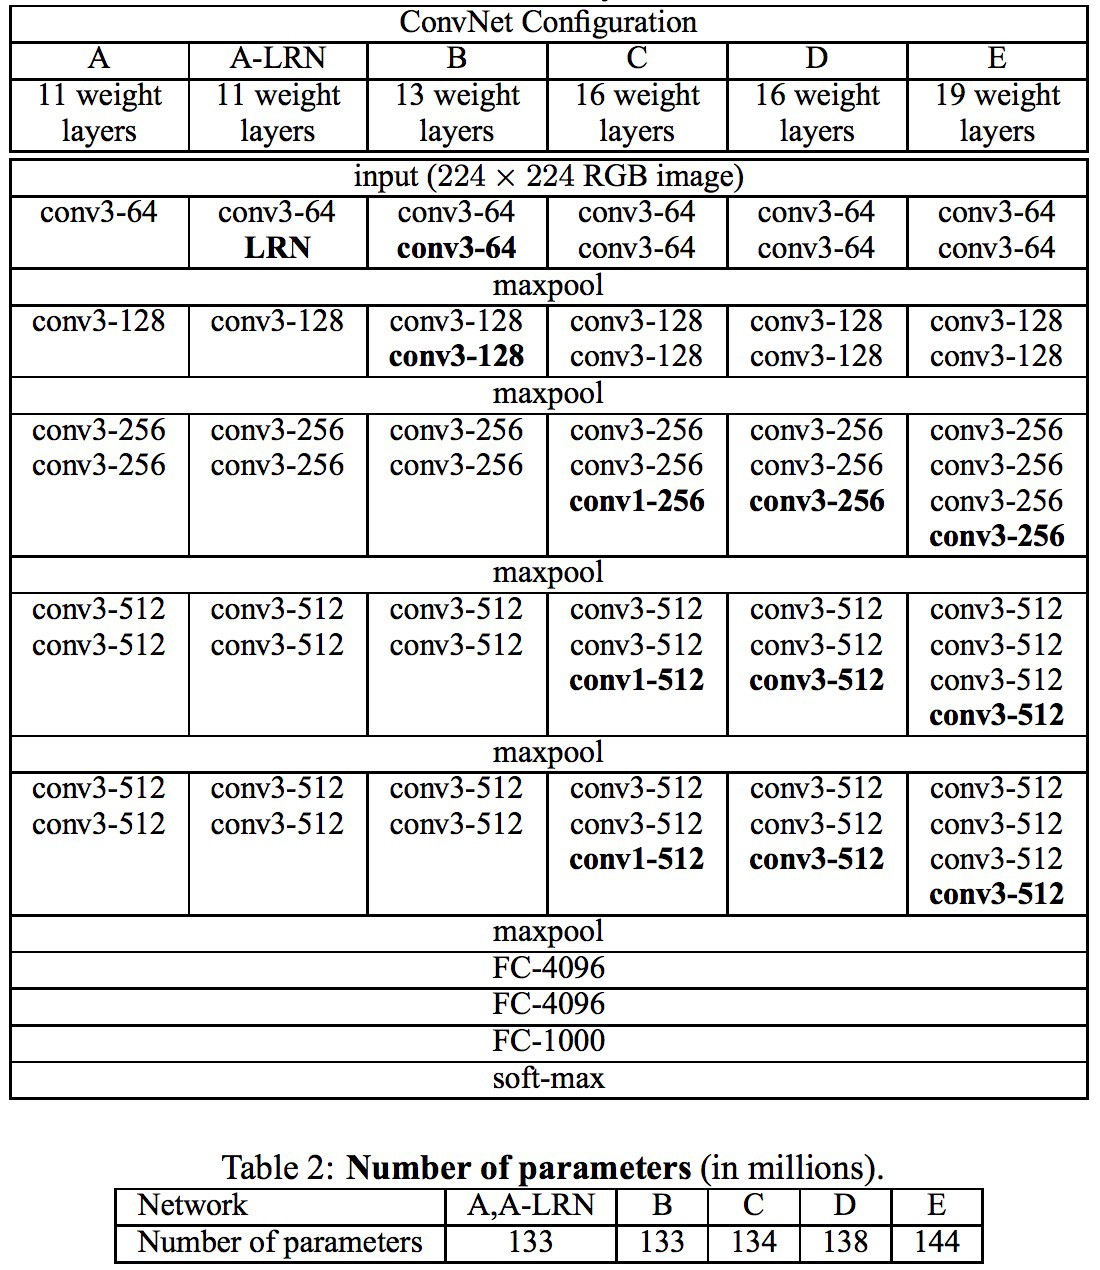

작은 filter을 사용해서 상대적으로 파라미터의 수를 줄였지만 depth layer로 인해 그 수가 엄청 많은 것을 볼 수 있다...(googlnet은 5백만개....)

- training scale(S) : single-scale training, multi-scale training
    1. single-scale training: S= 256, 384로 학습 이미지를 통일
    2. multi-scale training : Smin=256, Smax= 512 의 범위에서 무작위로 scale을 정해 crop, 다양한 사진으로 학습을 시킬 수 있다.
        - Multi-crop evaluation: 원래 image를 multi-crop 하여 crop들 각각을 convNet에 적용
        - dense evaluation: Image 전체를 곧바로 convNet에 적용하고 일정한 pixel grid (픽셀간격)으로 sliding window를 적용하듯 결과 가져옴, pixel grid 크기 문제로 인해 학습 정확도가 약간 떨어질 수 있음
- Data augmentation 효과(overfiting을 줄인다.)


(image를 scale을 조절하여 cropping을 할 수 있구나....또한 augmentation 기능도 할 수 있구나....시각이 넓어진다...)

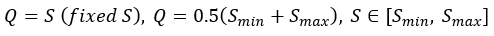

- 결과
    - layer의 층이 늘어날 수록(A->E) 성능이 좋아진다.
    - 또한 작지만 multi-scale test가 더 좋은 성능을 보여준다.
    - Dense evaluation와 같이 적용하게 된다면 더욱 성능이 올라간다

- 하지만 역시 parametet의 수가 엄청나게 많기 때문에 시간이 오래걸린다.(그러한 이유로 ResNet이 나온거구나....)
- 특히 마지막 FCL 3개에서 연상량이 급 상승한다.

- Backbone: https://hoya012.github.io/blog/Tutorials-of-Object-Detection-Using-Deep-Learning-performance-two/
- Fast R-CNN, Resnet 심화, YOLO를 공부하려 한다.

In [ ]:
# 아직 Tensorflow만 할 수 있으니
# googlenet 보다 정말 구조가 직관적이다...근데 성능도 좋아...
# 거시에 AlexNet도 GPU model또한 병렬구조...
# 수업시간에 전이모델 구현을 참조하면서 만들어 보자.

# VGG-16 weight layer!!
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2))) #size가 1/2가 되었으니!
#
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#FCL
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000, activation="softmax"))